In [14]:
import scipy
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import skimage

import src.utility.generate_dataset as generate_dataset


IMG_PATH = '~/Datasets/mpii/'
ANNOTATION_PATH = '../../data/mpii_human_pose_v1_u12_2/mpii_human_pose_v1_u12_1.mat'
column_names = ['name', 'activity', 'category', 'person_count', 'train']

In [8]:
dataset = pd.DataFrame(generate_dataset.load_dataset(ANNOTATION_PATH), columns=column_names)

In [9]:
dataset.head(5)

,name,activity,category,person_count,train
0,037454012.jpg,None,None,1,0
1,095071431.jpg,None,None,0,0
2,073199394.jpg,None,None,1,0
3,059865848.jpg,None,None,1,0
4,015601864.jpg,curling,sports,2,1


In [71]:
dataset.category.value_counts()

sports                    3593
occupation                2412
conditioning exercise     1755
home activities           1416
lawn and garden           1130
home repair               1090
water activities          1066
winter activities          778
miscellaneous              755
fishing and hunting        725
dancing                    722
walking                    608
music playing              583
bicycling                  533
running                    316
inactivity quiet/light     189
religious activities       124
transportation              93
self care                   90
volunteer activities        55
Name: category, dtype: int64

In [105]:
dataset[dataset.category == 'sports']

,name,activity,category,person_count,train
4,015601864.jpg,curling,sports,2,1
5,015599452.jpg,curling,sports,1,1
6,005808361.jpg,curling,sports,0,1
7,086617615.jpg,curling,sports,0,1
8,060111501.jpg,curling,sports,1,1
...,...,...,...,...,...
24899,012741552.jpg,"moto-cross, off-road motor sports, all-terrain...",sports,2,1
24900,089258378.jpg,"moto-cross, off-road motor sports, all-terrain...",sports,2,1
24901,076912890.jpg,"moto-cross, off-road motor sports, all-terrain...",sports,0,1
24902,099616030.jpg,"moto-cross, off-road motor sports, all-terrain...",sports,1,1


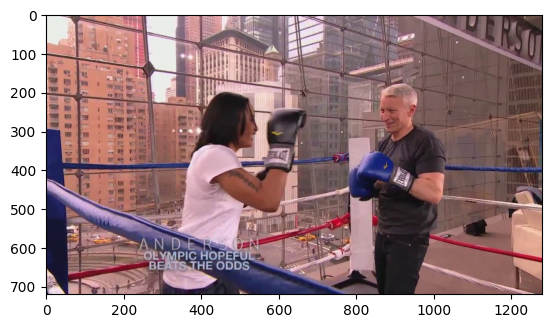

In [110]:
current_row = dataset.iloc[12016]
current_img = cv2.cvtColor(cv2.imread(IMG_PATH + current_row['name'], cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
plt.imshow(current_img)

In [111]:
plot_size = (15, 10)

img_idx = [14976, 5051, 4247, 5838, 12016]

title = "Comparison of different filters"

operation = ['normal', 'canny', 'hessian', 'hog', 'slic']

filter_dict = {
    "normal": lambda inp: inp,
    # hog return two values [features, representation], thus we need to take second one
    "hog": lambda inp: skimage.feature.hog(inp, visualize=True, channel_axis=-1)[1],
    "hessian": lambda inp: skimage.filters.hessian(inp),
    "slic": lambda inp: skimage.segmentation.slic(inp),
    "canny": lambda inp: skimage.feature.canny(cv2.cvtColor(inp, cv2.COLOR_RGB2GRAY), sigma=0.5)
}

plot_parameters_dict = {
    "normal": {},
    "hog": {'cmap': 'gray'},
    "hessian": {'cmap': 'gray'},
    "slic": {'cmap': 'tab20'},
    "canny": {'cmap': 'gray'},
}



/home/jakub/PycharmProjects/analiza-obrazow-cyfrowych-projekt/venv/lib/python3.10/site-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


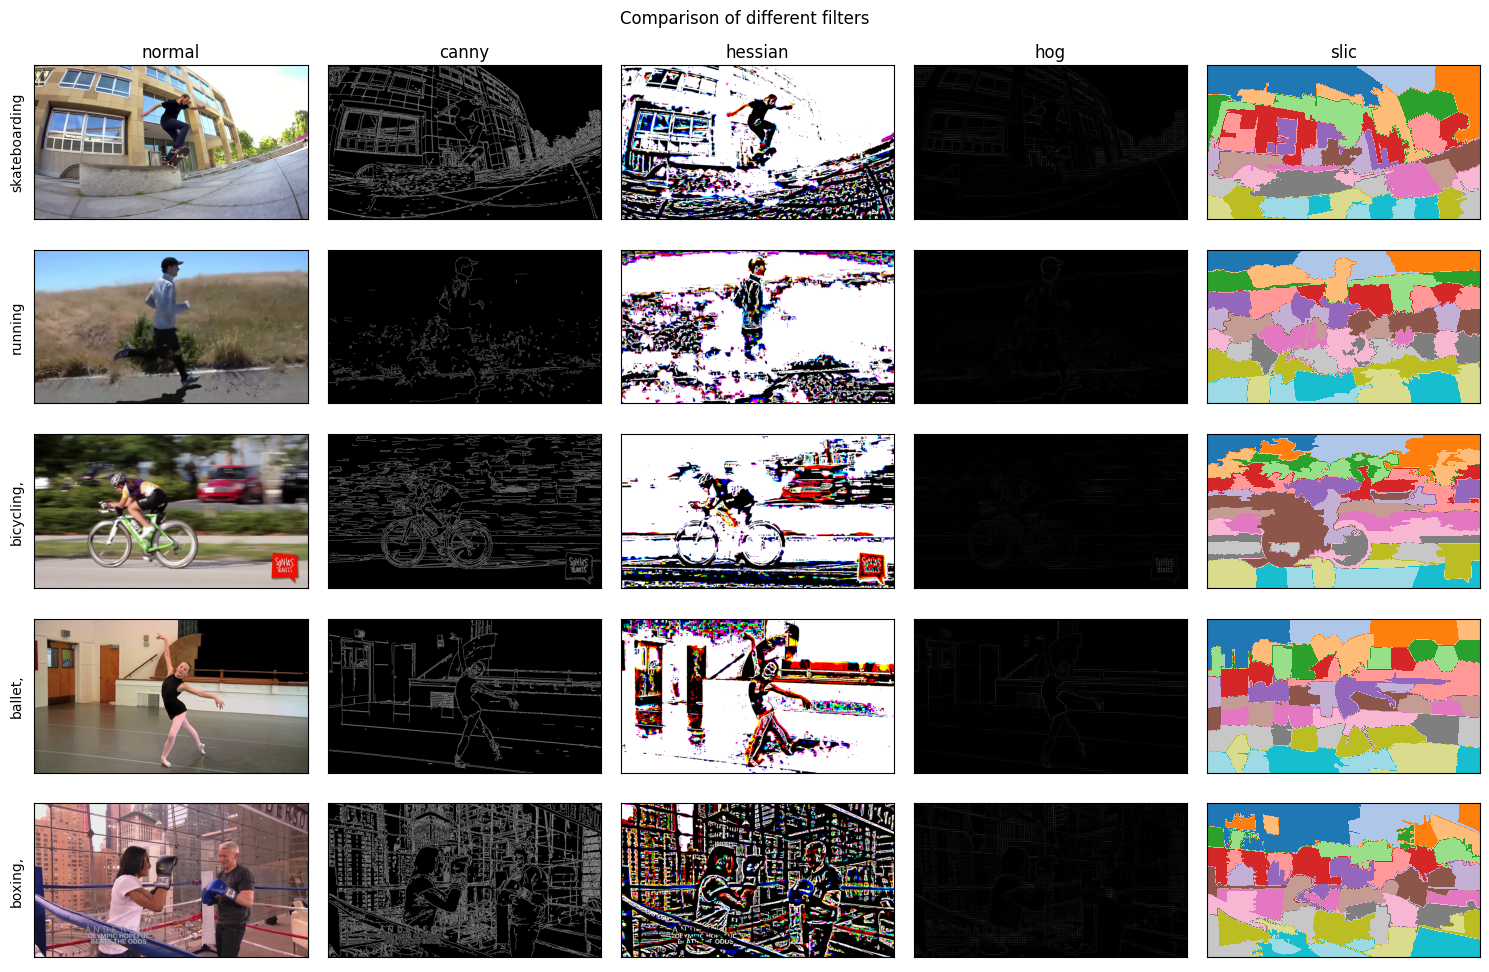

In [113]:
plot_rows = len(img_idx)
plot_cols = len(operation)

figure, axs = plt.subplots(plot_rows, plot_cols, figsize=plot_size)

figure.suptitle(title)

for i in range(plot_rows):
    current_row = dataset.iloc[img_idx[i]]
    current_img = cv2.cvtColor(cv2.imread(IMG_PATH + current_row['name'], cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    for j in range(plot_cols):

        axs[i, j].imshow(filter_dict[operation[j]](current_img), **plot_parameters_dict[operation[j]])
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

        if i == 0:
            axs[i, j].title.set_text(operation[j])
        if j == 0:
            axs[i, j].set_ylabel(current_row['activity'].split()[0])

figure.subplots_adjust(wspace=0, hspace=0)
figure.tight_layout()

plt.show()

In [114]:
figure.savefig('filters_comparison.png')